**IMPORTING LIBRARIES**

In [249]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [250]:

import numpy as np
import seaborn as sns
from glob import glob
import os

 **LOADING THE DATAFILES AND DATA CLEANING AND PREPROCESSING**

In [251]:
dataf_0=pd.read_csv("/content/datafile_0.csv")
dataf_1=pd.read_csv("/content/datafile_1.csv")
dataf_2=pd.read_csv("/content/datafile_2.csv")
dataf_3=pd.read_csv("/content/datafile_3.csv")
dataf_4=pd.read_csv("/content/datafile_4.csv")

In [252]:
dataf_0

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [253]:
dataf_0.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [254]:
dataf_0.isnull().any()

Crop       True
2004-05    True
2005-06    True
2006-07    True
2007-08    True
2008-09    True
2009-10    True
2010-11    True
2011-12    True
dtype: bool

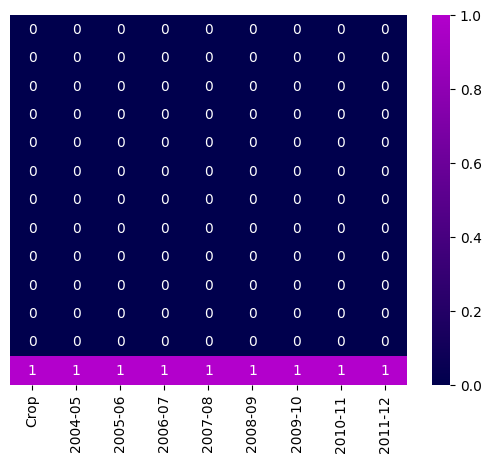

In [255]:
import matplotlib.colors as mcolors
import numpy as np

# Create a custom colormap with black and purple
colors = [(0, 0, 0.3), (0.7, 0.0, 0.8)]
cmap_name = "black_purple"
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=250)

# Assuming 'dataf_0' is your DataFrame
sns.heatmap(dataf_0.isnull(), yticklabels=False, annot=True, cmap=custom_cmap)

# Show the plot
plt.show()

In [256]:
dataf_0=dataf_0.dropna(how='all')

In [257]:
dataf_0

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [258]:
dataf_1

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [259]:
dataf_1.isnull().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [260]:
dataf_2

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
5,Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
9,Coarse Cereals,138.5,166.4,163.5,137.0,178.4,106.4,105.6,101.8,102.6,105.4,130.1,157.6,160.7,133.5,169.2


In [261]:
dataf_2.isnull().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

In [262]:
dataf_3

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN
...,...,...,...,...,...
73,Mesta,SHRESTHA (JRM-5),-,"Andhra Pradesh, Orissa, Assam, Maharashtra, Bi...",NaN
74,Cotton,CNH012,165,"Gujarat, Maharashtra and Madhya Pradesh.",NaN
75,Cotton,CICR-3 (CISA 614),150,"Punjab, Haryana and Uttar Pradesh under wilt f...",NaN
76,Cotton,VBCH 2231,NaN,"Maharashtra, Gujarat, Madhya Pradesh and Oriss...",NaN


In [263]:
dataf_3.isnull().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [264]:
dataf_3.isnull().any()

Crop                        False
Variety                     False
Season/ duration in days     True
Recommended Zone             True
Unnamed: 4                   True
dtype: bool

<Axes: >

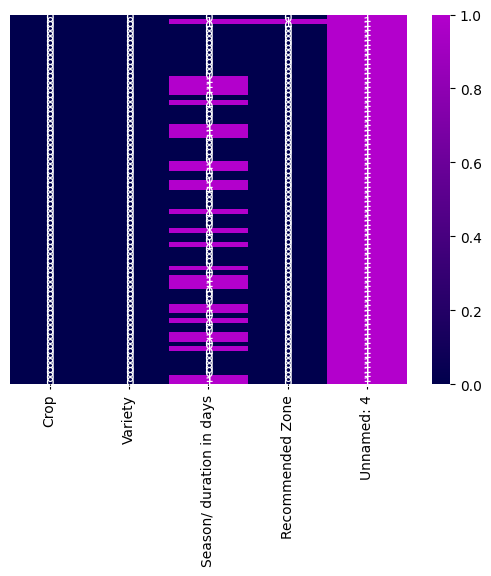

In [265]:
sns.heatmap(dataf_3.isnull(),yticklabels=False,annot=True,  cmap=custom_cmap)

In [266]:
dataf_3.fillna(0)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",0.0
1,Paddy,(CNI 383-5-11),0,0,0.0
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",0.0
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",0.0
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",0.0
...,...,...,...,...,...
73,Mesta,SHRESTHA (JRM-5),-,"Andhra Pradesh, Orissa, Assam, Maharashtra, Bi...",0.0
74,Cotton,CNH012,165,"Gujarat, Maharashtra and Madhya Pradesh.",0.0
75,Cotton,CICR-3 (CISA 614),150,"Punjab, Haryana and Uttar Pradesh under wilt f...",0.0
76,Cotton,VBCH 2231,0,"Maharashtra, Gujarat, Madhya Pradesh and Oriss...",0.0


In [267]:
dataf_3.fillna(method='ffill')

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN
...,...,...,...,...,...
73,Mesta,SHRESTHA (JRM-5),-,"Andhra Pradesh, Orissa, Assam, Maharashtra, Bi...",NaN
74,Cotton,CNH012,165,"Gujarat, Maharashtra and Madhya Pradesh.",NaN
75,Cotton,CICR-3 (CISA 614),150,"Punjab, Haryana and Uttar Pradesh under wilt f...",NaN
76,Cotton,VBCH 2231,150,"Maharashtra, Gujarat, Madhya Pradesh and Oriss...",NaN


In [268]:
dataf_3=dataf_3.dropna(axis=1,how='all')

In [269]:
dataf_3=dataf_3.fillna(method='ffill')

In [270]:
dataf_3

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
1,Paddy,(CNI 383-5-11),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
...,...,...,...,...
73,Mesta,SHRESTHA (JRM-5),-,"Andhra Pradesh, Orissa, Assam, Maharashtra, Bi..."
74,Cotton,CNH012,165,"Gujarat, Maharashtra and Madhya Pradesh."
75,Cotton,CICR-3 (CISA 614),150,"Punjab, Haryana and Uttar Pradesh under wilt f..."
76,Cotton,VBCH 2231,150,"Maharashtra, Gujarat, Madhya Pradesh and Oriss..."


In [271]:
dataf_4

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,NaN
425,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,NaN
426,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,NaN
427,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,NaN


In [272]:
dataf_4.isnull().sum()

Particulars      0
Frequency        0
Unit             0
 3-1993        426
 3-1994        425
 3-1995        425
 3-1996        423
 3-1997        419
 3-1998        419
 3-1999        418
 3-2000        409
 3-2001        407
 3-2002        393
 3-2003        301
 3-2004         68
 3-2005          4
 3-2006          6
 3-2007         11
 3-2008         12
 3-2009         11
 3-2010         26
 3-2011         25
 3-2012         41
 3-2013        131
 3-2014        366
dtype: int64

In [273]:
dataf_4=dataf_4.fillna(method='ffill')

In [274]:
dataf_4=dataf_4.fillna(method='bfill')

In [275]:
dataf_4=dataf_4.interpolate()

In [276]:
dataf_4

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,0.0,0.0,0.0,0.418,4.18,3.62,23.61,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,0.0,0.0,0.0,0.418,4.18,3.62,23.61,...,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,0.0,0.0,0.0,0.418,4.18,3.62,23.61,...,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,0.0,0.0,0.0,0.418,4.18,3.62,23.61,...,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,0.0,0.0,0.0,0.418,4.18,3.62,23.61,...,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.000,0.00,0.10,0.00,...,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,1672.0000
425,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.000,0.00,0.10,0.00,...,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,1672.0000
426,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.000,0.00,0.10,0.00,...,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,1672.0000
427,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.000,0.00,0.10,0.00,...,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,1672.0000


In [277]:
dataf_1.head()
dataf_1.tail()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
44,SUGARCANE,Tamil Nadu,66335.06,89025.27,85.79,1015.45
45,WHEAT,Madhya Pradesh,12464.40,22489.75,810.25,23.59
46,WHEAT,Punjab,17945.58,35423.48,804.80,39.83
47,WHEAT,Uttar Pradesh,18979.38,31902.74,769.84,34.99
48,WHEAT,Rajasthan,19119.08,29876.36,683.58,37.19


In [278]:
dataf_2.head()
dataf_2.tail()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
50,Sweet potato,81.1,79.3,94.2,92.1,88.1,75.8,75.4,88.4,84.6,80.4,106.9,105.2,106.6,108.8,109.6
51,Onion,240.5,247.3,367.1,329.1,409.1,207.7,208.4,246.8,223.6,314.7,115.8,118.7,148.8,147.1,130.0
52,Banana,189.3,201.1,298.8,301.7,339.4,117.6,131.2,174.8,189.8,204.6,161.0,153.3,171.0,159.0,165.9
53,Sugarcane,149.8,146.7,120.1,123.2,144.3,142.6,140.0,122.2,115.6,135.2,105.1,104.8,98.3,106.6,106.7
54,Tobacco,88.1,83.6,96.4,105.3,140.9,88.8,83.9,94.2,107.1,118.8,99.1,88.3,102.4,109.6,118.6


In [279]:
dataf_3.head()
dataf_3.tail()

,Crop,Variety,Season/ duration in days,Recommended Zone
73,Mesta,SHRESTHA (JRM-5),-,"Andhra Pradesh, Orissa, Assam, Maharashtra, Bi..."
74,Cotton,CNH012,165,"Gujarat, Maharashtra and Madhya Pradesh."
75,Cotton,CICR-3 (CISA 614),150,"Punjab, Haryana and Uttar Pradesh under wilt f..."
76,Cotton,VBCH 2231,150,"Maharashtra, Gujarat, Madhya Pradesh and Oriss..."
77,Desi Cotton,FDK 124,150,"Punjab, Haryana and Rajasthan under irrigated ..."


In [280]:
dataf_4.head()
dataf_4.tail()

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
424,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,778.0,669.0,807.0,1015.0,1031.0,541.0,1051.0,1080.0,1156.0,1672.0
425,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,1054.0,985.0,1951.0,1943.0,2424.0,2516.0,2476.0,3625.0,2357.0,1672.0
426,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,1577.0,1383.0,1404.0,1454.0,1550.0,1541.0,1563.0,1759.0,1845.0,1672.0
427,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,1222.0,1188.0,1318.0,1319.0,1280.0,1160.0,1328.0,1320.0,1360.0,1672.0
428,Agricultural Production Foodgrains Coarse Cere...,"Annual, Ending mar Of Each Year",kg/ha,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,2443.0,2132.0,2589.0,2729.0,3319.0,3531.0,3700.0,3455.0,5250.0,1672.0


In [281]:
datafile_list= sorted(glob('datafile_*.csv'))
datafile_list

['datafile_0.csv',
 'datafile_1.csv',
 'datafile_2.csv',
 'datafile_3.csv',
 'datafile_4.csv']

In [282]:
merged_data=pd.concat(pd.read_csv(datafile).assign(sourcefilename=datafile)for datafile in datafile_list)
merged_data

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,sourcefilename,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,datafile_0.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,datafile_0.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,datafile_0.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,datafile_0.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,datafile_0.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datafile_4.csv,...,778.0,669.0,807.0,1015.0,1031.0,541.0,1051.0,1080.0,1156.0,NaN
425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datafile_4.csv,...,1054.0,985.0,1951.0,1943.0,2424.0,2516.0,2476.0,3625.0,2357.0,NaN
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datafile_4.csv,...,1577.0,1383.0,1404.0,1454.0,1550.0,1541.0,1563.0,1759.0,1845.0,NaN
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datafile_4.csv,...,1222.0,1188.0,1318.0,1319.0,1280.0,1160.0,1328.0,1320.0,1360.0,NaN


In [283]:
merged_data.to_csv('merged.csv')

In [284]:
mdata=pd.read_csv("merged.csv")
mdata

,Unnamed: 0,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,778.0,669.0,807.0,1015.0,1031.0,541.0,1051.0,1080.0,1156.0,NaN
620,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1054.0,985.0,1951.0,1943.0,2424.0,2516.0,2476.0,3625.0,2357.0,NaN
621,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1577.0,1383.0,1404.0,1454.0,1550.0,1541.0,1563.0,1759.0,1845.0,NaN
622,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.0,1188.0,1318.0,1319.0,1280.0,1160.0,1328.0,1320.0,1360.0,NaN


In [285]:
mdata.isnull().sum()

Unnamed: 0      0
Crop          485
2004-05       612
2005-06       612
2006-07       612
             ... 
 3-2010       221
 3-2011       220
 3-2012       236
 3-2013       326
 3-2014       561
Length: 61, dtype: int64

In [286]:
mdata.isnull().any()

Unnamed: 0    False
Crop           True
2004-05        True
2005-06        True
2006-07        True
              ...  
 3-2010        True
 3-2011        True
 3-2012        True
 3-2013        True
 3-2014        True
Length: 61, dtype: bool

In [287]:
mdata.dropna(how='all')

,Unnamed: 0,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,778.0,669.0,807.0,1015.0,1031.0,541.0,1051.0,1080.0,1156.0,NaN
620,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1054.0,985.0,1951.0,1943.0,2424.0,2516.0,2476.0,3625.0,2357.0,NaN
621,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1577.0,1383.0,1404.0,1454.0,1550.0,1541.0,1563.0,1759.0,1845.0,NaN
622,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1222.0,1188.0,1318.0,1319.0,1280.0,1160.0,1328.0,1320.0,1360.0,NaN


In [288]:
mdata=mdata.fillna(method='ffill')
mdata

,Unnamed: 0,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,424,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,778.0,669.0,807.0,1015.0,1031.0,541.0,1051.0,1080.0,1156.0,1672.0
620,425,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1054.0,985.0,1951.0,1943.0,2424.0,2516.0,2476.0,3625.0,2357.0,1672.0
621,426,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1577.0,1383.0,1404.0,1454.0,1550.0,1541.0,1563.0,1759.0,1845.0,1672.0
622,427,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1222.0,1188.0,1318.0,1319.0,1280.0,1160.0,1328.0,1320.0,1360.0,1672.0


In [289]:
mdata=mdata.fillna(method='bfill')
mdata

,Unnamed: 0,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
2,2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
3,3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
4,4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,424,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,1672.0000
620,425,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,1672.0000
621,426,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,1672.0000
622,427,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,1672.0000


In [290]:
mdata=mdata.interpolate()
mdata

,Unnamed: 0,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
2,2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
3,3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
4,4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,424,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,778.00000,669.0000,807.00000,1015.00000,1031.000000,541.000000,1051.000000,1080.000000,1156.00,1672.0000
620,425,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1054.00000,985.0000,1951.00000,1943.00000,2424.000000,2516.000000,2476.000000,3625.000000,2357.00,1672.0000
621,426,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1577.00000,1383.0000,1404.00000,1454.00000,1550.000000,1541.000000,1563.000000,1759.000000,1845.00,1672.0000
622,427,Desi Cotton,100.0,99.0,101.0,104.0,106.0,115.0,123.0,122.0,...,1222.00000,1188.0000,1318.00000,1319.00000,1280.000000,1160.000000,1328.000000,1320.000000,1360.00,1672.0000


In [291]:
mdata.isnull().sum()

Unnamed: 0    0
Crop          0
2004-05       0
2005-06       0
2006-07       0
             ..
 3-2010       0
 3-2011       0
 3-2012       0
 3-2013       0
 3-2014       0
Length: 61, dtype: int64

In [292]:
mdata= mdata.drop('Unnamed: 0', axis=1)

In [293]:
print(mdata['Crop'].dtype)

object


In [294]:
mdata['Crop'] = mdata['Crop'].astype(str)

In [295]:
print(mdata['Crop'].dtype)

object


**LABEL ENCODING CROP NAME AND STATE NAME AND RETRIEVING UNIQUE NUMBER FOR EACH**

In [296]:


# Create a mapping of unique crop names to unique numbers
crop_name_mapping = {crop: idx for idx, crop in enumerate(mdata['Crop'].unique())}

# Replace crop names with unique numbers
mdata['Crop'] = mdata['Crop'].map(crop_name_mapping)

In [297]:


# Create a mapping of unique state names to unique numbers
state_name_mapping = {state: idx for idx, state in enumerate(mdata['State'].unique())}

# Replace state names with unique numbers
mdata['State'] = mdata['State'].map(state_name_mapping)

In [298]:
print(mdata['Crop'])
print(mdata['State'])

0       0
1       1
2       2
3       3
4       4
       ..
619    49
620    49
621    49
622    49
623    49
Name: Crop, Length: 624, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
619    7
620    7
621    7
622    7
623    7
Name: State, Length: 624, dtype: int64


In [299]:
#reverse mapping dictionary 'crop_name_mapping'
# Enter the crop name you want to convert to the unique number
crop_name = input('Enter the crop')  # Replace with the crop name you want to look up

# Use the reverse mapping dictionary to get the unique number from the crop name
unique_number = crop_name_mapping.get(crop_name, -1)  # Default to -1 if not found

if unique_number != -1:
    print("Unique Number for Crop Name:", unique_number)
else:
    print("Crop Name not found ")



Enter the cropRice
Unique Number for Crop Name: 0


In [300]:
# reverse mapping dictionary 'state_name_mapping'

# Take state name input from the user
state_name_input = input("Enter the state name: ")

# Use the reverse mapping dictionary to get the unique number from the state name
unique_number = state_name_mapping.get(state_name_input, -1)  # Default to -1 if not found

if unique_number != -1:
    print(f"Unique Number for State Name '{state_name_input}': {unique_number}")
else:
    print(f"State Name '{state_name_input}' not found in mapping.")


Enter the state name: Gujarat
Unique Number for State Name 'Gujarat': 2


In [301]:
# Create a mapping of unique crop names to unique numbers
season_name_mapping = {season: idx for idx, season in enumerate(mdata['Season/ duration in days'].unique())}

# Replace crop names with unique numbers
mdata['Season/ duration in days'] = mdata['Season/ duration in days'].map(season_name_mapping)

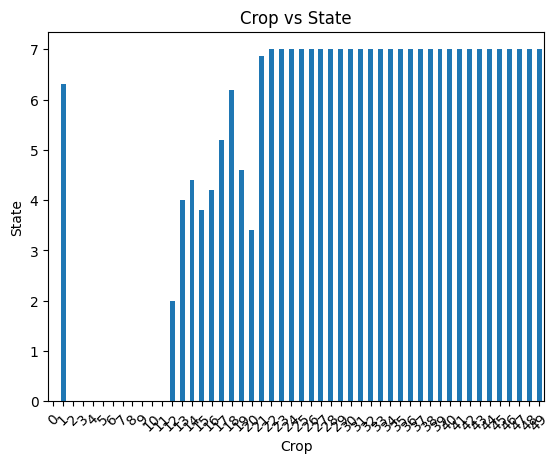

In [302]:
mdata.groupby('Crop')['State'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Crop')
plt.ylabel('State')
plt.title('Crop vs State')
plt.show()

In [303]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



**SPLITTING DATA INTO TRAINING SET AND TESTING SET**

In [304]:
X = mdata[['Crop','State','Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2',]]
Y = mdata["Cost of Production (`/Quintal) C2"]


In [305]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (624, 4)
Shape of Y: (624,)


In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**RANDOM FOREST REGRESSOR**

In [307]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

In [308]:
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [309]:
# Make predictions on the testing set
Y_pred = rf.predict(X_test)

# Evaluate the model
mean_error= mean_squared_error(Y_test, Y_pred)
rmean_error= mean_error**0.5
print("Root Mean Squared Error:", rmean_error)


Root Mean Squared Error: 143.19862079320677


**LINEAR REGRESSION**

In [310]:
from sklearn.linear_model import LinearRegression

# Create and fit a Linear Regression model
reg = LinearRegression()
reg.fit(X_train, Y_train)

# Make predictions
Y_pred1 = reg.predict(X_test)

#Evaluate the model
mean_error1= mean_squared_error(Y_test, Y_pred1)
rmean_error1= mean_error1**0.5
print("Root Mean Squared Error:", rmean_error1)

Root Mean Squared Error: 220.18985808289827


**SUPPORT VECTOR REGRESSOR**


In [311]:
from sklearn import svm

svm=svm.SVR()

svm.fit(X_train, Y_train)


Y_pred2 = svm.predict(X_test)

#Evaluate the model
mean_error2= mean_squared_error(Y_test, Y_pred2)
rmean_error2= mean_error1**0.5
print("Root Mean Squared Error:", rmean_error2)

Root Mean Squared Error: 220.18985808289827


In [312]:
final_data=pd.DataFrame({'Models': ['Random Forest-rf', 'Linear Regression-reg', 'SVR'],
                         'RMSE': [rmean_error,rmean_error1,rmean_error2]})

In [313]:
final_data

,Models,RMSE
0,Random Forest-rf,143.198621
1,Linear Regression-reg,220.189858
2,SVR,220.189858


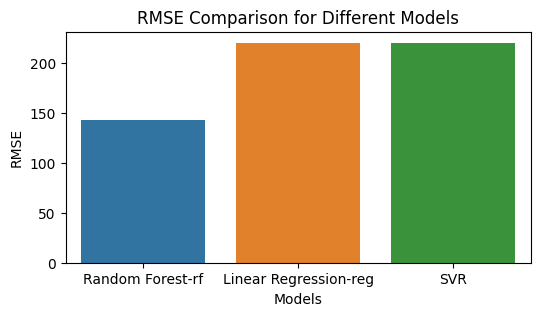

In [314]:

plt.figure(figsize=(6, 3))
sns.barplot(data=final_data, x='Models', y='RMSE')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Models')
plt.show()


**USING RANDOM FOREST REGRESSOR**

In [315]:
# Use the model to make predictions on new data
a=input("Enter the crop")
b = input("Enter the State\n")
d = input("Enter the cultivation cost per hectare\n")
e = input("Enter the cultivation cost per hectare in c2\n")
new_data = pd.DataFrame({'Crop': [a],'State': [b], 'Cost of Cultivation (`/Hectare) A2+FL': [d], 'Cost of Cultivation (`/Hectare) C2': [e]})
areaYield = rf.predict(new_data)
print("The Cost of production is ", areaYield)

Enter the crop0
Enter the State
2
Enter the cultivation cost per hectare
23456
Enter the cultivation cost per hectare in c2
34522
The Cost of production is  [2159.1574]


**SAVE MODEL USING JOBLIB**

In [316]:
import joblib

In [317]:
joblib.dump(rf,'model_crop')

['model_crop']

In [318]:
model=joblib.load('model_crop')

In [319]:
model.predict(new_data)

array([2159.1574])